In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Download Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [3]:
df.shape

(9704, 11)

In [4]:
homework_cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
homework_df = df[homework_cols]
homework_df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [5]:
homework_df.dtypes

engine_displacement      int64
horsepower             float64
vehicle_weight         float64
model_year               int64
fuel_efficiency_mpg    float64
dtype: object

In [6]:
max_year = homework_df.model_year.max()
max_year

np.int64(2023)

### 1. There's one column with missing values. What is it?

In [7]:
homework_df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### 2. What's the median (50% percentile) for variable <code>'horsepower'</code>?

In [8]:
homework_df.horsepower.median()

np.float64(149.0)

### Shuffle the dataset
- Shuffle the dataset using a seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [9]:
# shuffle 
seed = 42
n = homework_df.shape[0]
idx = np.arange(n)
np.random.seed(seed)
np.random.shuffle(idx)

In [10]:
homework_df_shuffled = homework_df.iloc[idx]
homework_df_shuffled.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [11]:
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
print(n_train, n_val, n_test)

5824 1940 1940


In [12]:
df_train = homework_df_shuffled.iloc[:n_train].copy()
df_val = homework_df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = homework_df_shuffled.iloc[n_train+n_val:].copy()

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

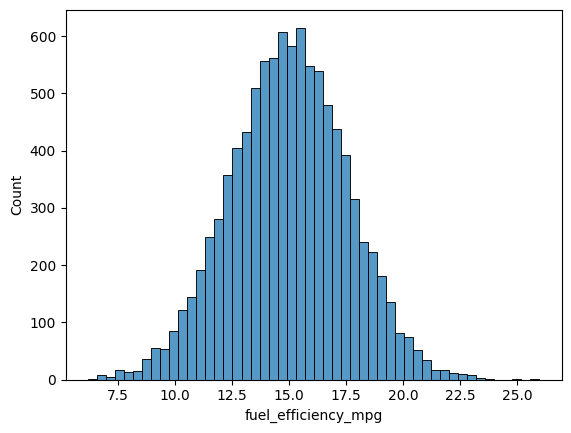

In [13]:
# check distribution of target variable
# distribution appears to be normal
# log transformation may not be necessary
sns.histplot(homework_df.fuel_efficiency_mpg, bins=50)

In [14]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

### 3.
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [15]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [16]:
base_features = ['engine_displacement', 'horsepower', 'vehicle_weight']
def prepare_X(df, fill_value=0):
    features = base_features.copy()
    df['age'] = max_year - df.model_year
    features.append('age')
    
    df_num = df[features]
    df_num = df_num.fillna({'horsepower': fill_value})
    X = df_num.values
    return X

In [17]:
def predict_y(X, w0, weights):
    pred = w0 + X @ weights
    return pred

In [18]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [19]:
# fill with 0
X_train = prepare_X(df_train, fill_value=0)
w_0, w = train_linear_regression(X_train, y_train)
y_pred_train = predict_y(X_train, w_0, w)
rmse_train = rmse(y_train, y_pred_train)
print(f'RMSE (train, fill 0): {round(rmse_train, 2)}')


RMSE (train, fill 0): 0.52


In [20]:
# fill with mean value of training set
X_train = prepare_X(df_train, fill_value=df_train.horsepower.mean())
w_0, w = train_linear_regression(X_train, y_train)
y_pred_train = predict_y(X_train, w_0, w)
rmse_train = rmse(y_train, y_pred_train)
print(f'RMSE (train, fill mean of horsepower): {round(rmse_train, 2)}')

RMSE (train, fill mean of horsepower): 0.46


### 4. Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

In [21]:
def train_linear_regression_regularised(X, y, reg_penalty = 0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X) + reg_penalty * np.eye(X.shape[1])
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [22]:
X_train = prepare_X(df_train, fill_value=0)
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_regularised(X_train, y_train, reg_penalty=r)
    y_pred_val = predict_y(X_train, w_0, w)
    rmse_val = rmse(y_train, y_pred_val)
    print(f'RMSE (train, fill 0, r={r}): {round(rmse_val, 2)}')

RMSE (train, fill 0, r=0): 0.52
RMSE (train, fill 0, r=0.01): 0.52
RMSE (train, fill 0, r=0.1): 0.52
RMSE (train, fill 0, r=1): 0.52
RMSE (train, fill 0, r=5): 0.56
RMSE (train, fill 0, r=10): 0.64
RMSE (train, fill 0, r=100): 2.0


### 5. We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

In [23]:
rmse_scores = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    homework_df_shuffled = homework_df.iloc[idx]

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    df_train = homework_df_shuffled.iloc[:n_train].copy()
    df_val = homework_df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = homework_df_shuffled.iloc[n_train+n_val:].copy()

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    X_train = prepare_X(df_train, fill_value=0)
    w_0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val, fill_value=0)
    y_pred_val = predict_y(X_val, w_0, w)
    rmse_val = rmse(y_val, y_pred_val)
    rmse_scores.append(rmse_val)
    print(f'RMSE (train, fill 0, seed={seed}): {round(rmse_val, 2)}')

print(f'Standard Deviation of RMSE scores: {round(np.std(rmse_scores), 3)}')

RMSE (train, fill 0, seed=0): 0.52
RMSE (train, fill 0, seed=1): 0.52
RMSE (train, fill 0, seed=2): 0.52
RMSE (train, fill 0, seed=3): 0.52
RMSE (train, fill 0, seed=4): 0.51
RMSE (train, fill 0, seed=5): 0.53
RMSE (train, fill 0, seed=6): 0.53
RMSE (train, fill 0, seed=7): 0.51
RMSE (train, fill 0, seed=8): 0.51
RMSE (train, fill 0, seed=9): 0.51
Standard Deviation of RMSE scores: 0.007


### 6. 
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [24]:
seed = 9
idx = np.arange(n)
np.random.seed(seed)
np.random.shuffle(idx)

homework_df_shuffled = homework_df.iloc[idx]

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

df_train = homework_df_shuffled.iloc[:n_train].copy()
df_val = homework_df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = homework_df_shuffled.iloc[n_train+n_val:].copy()

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

X_train = prepare_X(df_train, fill_value=0)
w_0, w = train_linear_regression_regularised(X_train, y_train, reg_penalty=0.001)

X_test = prepare_X(df_test, fill_value=0)
y_pred_test = predict_y(X_test, w_0, w)
rmse_test = rmse(y_test, y_pred_test)
print(f'RMSE (test, fill 0, seed={seed}): {round(rmse_test, 3)}')

RMSE (test, fill 0, seed=9): 0.516
